# Chapter 5 
# Support Vector Machines

*Support Vector Machine* (SVM) is one of the most popular models in Machine Learning. It is capable of performing linear or nonlinear classification, regression, and even outlier detection. This chapter will explain the core concepts of SVMs, how to use them, and how they work.

## Task 1: Linear SVM with Hard Margin
- Each data example has two features: $x_1$ and $x_2$. Using them as coordinates, they can be visualized as a data point on the coordinate plane.
- Binary classification: target value $y = 1$ means that the instance belongs to a certain class (class 1); $y = -1$ means that the instance belongs to another class (class -1).
- Classes are linearly separable: The two classes can clearly be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes perfectly (no mis-classification is allowed).
- The best straight line that separates the two classes is the one with maximized distance from it to the nearest data point on each class.

![title](Data/SVM1.png)

In the above graph, there are three lines (H1, H2, H3) that try to separate black dots from white dots.
- H1 is clearly bad because it doesn't even separate the two classes properly.
- H2 separates the two classes perfectly, but it is so close to the data points that it will probably not perform well on new instances.
- H3 not only separates the two classes but also stays as far away from the closest training instances as possible. It is reasonable to believe that H3 will generalize well on new instances.

![title](Data/SVM2.jpeg)

Notice that adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the *support vectors*.

SVMs are sensitive to the feature scales, so proper feature scaling is necessary for obtaining a good decision boundary.

### Express an SVM model with three parallel lines

We can use three lines to expression the above binary classifier:

- $w_1x_1 + w_2x_2 + b = 0$ represents the line in the middle of the gap.
- $w_1x_1 + w_2x_2 + b = 1$ represents the right boundary of the gap.
- $w_1x_1 + w_2x_2 + b = -1$ represents the left boundary of the gap.

The parameters of this model are $w_1(\ge 0), w_2, b$. To avoid ambiguity, we choose $w_1$ to be non-negative. Here all three lines share the same slope w because they are parallel. 

- For any point $(x_1,x_2)$ on the right half plane divided by the central line, the ecpression $w_1x_1 + w_2x_2 +b$ is positive.
- For any point $(x_1,x_2)$ on the left half plane, $w_1x_1+w_2x_2+b$ is negative.

**Question**: How to compute the slope of these lines?

If $w_2 = 0$, the line is vertical.
If $w_2\neg 0$ the slope is $-frac\(w_1)(w_2)\neg$

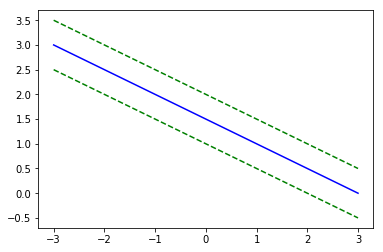

In [18]:
# Suppose w1 = 1, w2 = 2, and b = -3, draw the above
# three lines on a graph.

# graph the center line: x1 + 2x2 - 3 = 0
# sample some x1 values

import numpy as np
x1s = np.linspace(-3,3,100) #sample 100 x1 values between -3 and 3
# calculate their corresponding x2 values
# based on the equation, x2 = (3 - x1)/2
x2s = (3 - x1s)/2
# plot pairs (x1, x2)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x1s,x2s, 'b-')

# plot x1 + 2x2 - 3 = 1
# x2 = (4 - x1)/2
x2s_right = (4 - x1s)/2
plt.plot(x1s,x2s_right, 'g--')

# plot x1 + 2x2 -3 = -1
# x2 = (2 - x1)/2
x2s_left = (2 - x1s)/2
plt.plot(x1s,x2s_left, 'g--')


plt.show()

### Decision function and predictions

The linear SVM classifier model predicts the class of a new instance $(x_1, x_2)$ by simply computing the decision function $w_1x_1 + w_2x_2 + b$: if the result is positive, the predicted class is the class on the right, otherwise it is the class on the left.

**Decision rule**
\begin{equation}
\hat{y}(prediction)  = 
\left\{
\begin{array}{cc}
 1 & \textit{if } w_1x_1 + w_2x_2 + b \ge 0,\\
 -1 & \textit{if } w_1x_1 + w_2x_2 + b < 0.
\end{array}
\right.
\end{equation}

prediction p1: -1
prediction p2: 1
prediction p3: 1


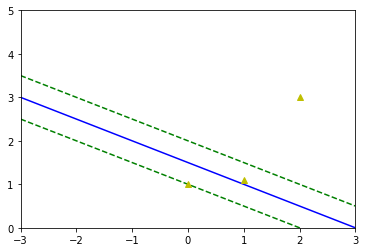

In [16]:
# Suppose w1 = 1, w2 = 2, and b = -3, decide the 
# class of: 

def decision(x1,x2):
    if((x1+2*x2-3) >= 0):
        return 1
    else:
        return -1
    
# 1) x_1 = 0, x_2 = 1; 
p1 = 0*1 + 2*1 - 3
print("prediction p1:" , decision(0,1))
# 2) x_1 = 2, x_2 = 3;
p2 = 2*1 + 3*2 -3
print("prediction p2:" ,decision(2,3))
# 3) x_1 = 1, x_2 = 1.1.
p3 = 1*1 + 2*1.1 - 3
print("prediction p3:", decision(1,1.1))
# Plot the points together with three decision lines.

x1s= np.linspace(-3,3,100) #sample 100 x1 values between -3 and 3
# calculate their corresponding x2 values
# based on the equation, x2 = (3 - x1)/2
x2s = (3 - x1s)/2
# plot pairs (x1, x2)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x1s,x2s, 'b-')

# plot x1 + 2x2 - 3 = 1
# x2 = (4 - x1)/2
x2s_right = (4 - x1s)/2
plt.plot(x1s,x2s_right, 'g--')

# plot x1 + 2x2 -3 = -1
# x2 = (2 - x1)/2
x2s_left = (2 - x1s)/2
plt.plot(x1s,x2s_left, 'g--')

plt.ylim(0,5)
plt.xlim(-3,3)

plt.plot(0,1, 'y^')
plt.plot(2,3, 'y^')
plt.plot(1,1.1, 'y^')


plt.show()

### Training objective
Let's explore how does the magnitude of parameters affect the margin.

(-3, 3)

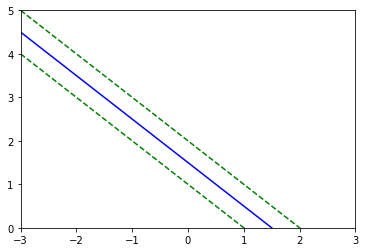

In [15]:
# In the previous model, increase w1 from 1 to 2,
# and plot the new decision margin.
x1s= np.linspace(-3,3,100) #sample 100 x1 values between -3 and 3
# calculate their corresponding x2 values
# based on the equation, x2 = (3 - 2*x1)/2
x2s = (3 - 2*x1s)/2
# plot pairs (x1, x2)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x1s,x2s, 'b-')

# plot x1 + 2x2 - 3 = 1
# x2 = (4 - 2*x1)/2
x2s_right = (4 - 2*x1s)/2
plt.plot(x1s,x2s_right, 'g--')

# plot x1 + 2x2 -3 = -1
# x2 = (2 - 2*x1)/2
x2s_left = (2 - 2*x1s)/2
plt.plot(x1s,x2s_left, 'g--')

plt.ylim(0,5)
plt.xlim(-3,3)

# the larger w is, the narrower the gap(goal)

(-3, 3)

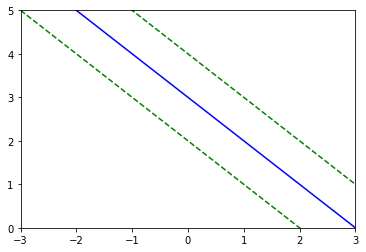

In [14]:
# Decrease w2 from 2 to 1 from the original model,
# and plot the new decision margin.

x1s= np.linspace(-3,3,100) #sample 100 x1 values between -3 and 3
# calculate their corresponding x2 values
# based on the equation, x2 = (3 - x1)
x2s = (3 - x1s)
# plot pairs (x1, x2)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x1s,x2s, 'b-')

# plot x1 + 2x2 - 3 = 1
# x2 = (4 - x1)
x2s_right = (4 - x1s)
plt.plot(x1s,x2s_right, 'g--')

# plot x1 + 2x2 -3 = -1
# x2 = (2 - x1)
x2s_left = (2 - x1s)
plt.plot(x1s,x2s_left, 'g--')

plt.ylim(0,5)
plt.xlim(-3,3)

# wider gap

(-3, 3)

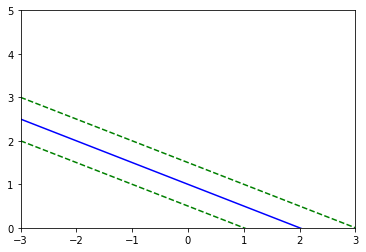

In [17]:
# Change b from -3 to -2 from the original model,
# and plot the new decision margin

x1s= np.linspace(-3,3,100) #sample 100 x1 values between -3 and 3
# calculate their corresponding x2 values
# based on the equation, x2 = (2 - x1)/2
x2s = (2 - x1s)/2
# plot pairs (x1, x2)
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(x1s,x2s, 'b-')

# plot x1 + 2x2 - 3 = 1
# x2 = (3 - x1)/2
x2s_right = (3 - x1s)/2
plt.plot(x1s,x2s_right, 'g--')

# plot x1 + 2x2 -3 = -1
# x2 = (1 - x1)/2
x2s_left = (1 - x1s)/2
plt.plot(x1s,x2s_left, 'g--')

plt.ylim(0,5)
plt.xlim(-3,3)

**Question**: How does each parameter affect the width of decision margin?

- smaller w_1 -> wider gap; larger w_1 -> narrower gap 
- smaller w_2 -> wider gap; larger w_2 -> narrower gap
- b does not affect the width of the gap

**(Hard margin) linear SVM classifier objective function**:

\begin{equation}
\begin{array}{cc}
\textit{minimize}_{w_1, w_2, b} & \frac{1}{2}(w_1^2 + w_2^2)\\
\textit{subject to} & y^{(i)}(w_1x_1^{(i)} + w_2x_2^{(i)} + b) \ge 1 \textit{ for all } i=1,...,m.
\end{array}
\end{equation}

- The factor 1/2 is used in the objective function only to make its partial derivatives simpler. (What are its partial derivatives?)
- Constraints will make sure that all data points will be placed on the correct side of the gap (thus called hard margin).
- If $y=1$, the model requires that $w_1x_1 + w_2x_2 + b \ge 1$. 
- If $y=-1$, the model requires that $w_1x_1 + w_2x_2 + b \le -1$.
- The objective function has nice properties: 1) it can be computed efficiently, 2) its partial derivates are even simpler, 3) it is a convex function.
- However, the existence of the linear constraints are annoying: gradient descent may violate some constraint during parameter update.

![title](Data/SVM3.png)

### Drawbacks of Hard Margin SVM
If we strictly impose that all instances be off the street and on the correct side, the model can only be applied to models that are linearly separable. Moreover, it will be very sensitive to outliers. The above figure illustrates how badly one outlier may affect the model. 

To avoid these issues, it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as wide as possible and limiting the margin violations. This is called *soft margin classification*.

## Task 2: Linear SVM with Soft Margin
- Each data example has two features: $x_1$ and $x_2$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

![title](Data/SVM4.jpg)

### Model
With parameters $w_1(\ge 0)$, $w_2$, and $b$:
- $w_1x_1 + w_2x_2 + b = 0$ represents the line in the middle of the gap.
- $w_1x_1 + w_2x_2 + b = 1$ represents the right boundary of the gap.
- $w_1x_1 + w_2x_2 + b = -1$ represents the left boundary of the gap.

### Objective function

$J(w_1, w_2, b)$ 
$= \frac{1}{2}(w_1^2+w_2^2) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}(w_1x_1^{(i)}+w_2x_2^{(i)}+b))$

- The first sum in the cost function will push the model to have small weights, leading to a larger margin.
- The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.
- Minimizing this term ensures that the model makes the margin violations as small and as few as possible.

### Hinge loss function
The function $\max(0, 1-t)$ used in the above cost function is called the *hinge loss* function. 
- It is equal to 0 when $t\ge 1$. 
- Its derivative (slope) is equal to 0 if $t>1$.
- Its derivative (slope) is equal to -1 if $t<1$.
- It is a convex function.

[ 4.          3.93939394  3.87878788  3.81818182  3.75757576] [-3.         -2.93939394 -2.87878788 -2.81818182 -2.75757576]


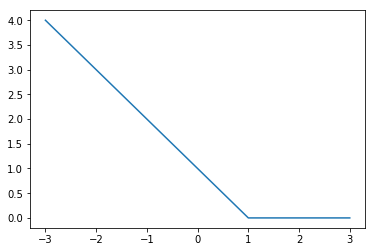

In [1]:
# plot the graph of the hinge loss function.
import numpy as np
ts = np.linspace(-3,3,100)
y = np.maximum(0,1-ts)
print (y[:5],ts[:5])

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(ts, y)
plt.show()

In [4]:
# Suppose w1 = 1, w2 = 2, and b = -3, decide the 
# margin violation of: 
# 1) x_1 = 0, x_2 = 1, y = -1; 
# 2) x_1 = 2, x_2 = 3, y = -1;
# 3) x_1 = 1, x_2 = 1.1, y = 1.

# cost term: max(0, 1-y*(w1*x1 + w2*x2 + b))
w1,w2,b = 1,2,-3
x1, x2, y = 0,1,-1
cost1 = max(0, 1-y*(w1*x1 + w2*x2 + b))
print('cost added by the first point:', cost1)

x1, x2, y = 2,3,-1
cost2 = max(0, 1-y*(w1*x1 + w2*x2 + b))
print('cost added by the second point:', cost2)

x1, x2, y = 1,1.1,1
cost3 = max(0, 1-y*(w1*x1 + w2*x2 + b))
print('cost added by the third point:', cost3)

cost added by the first point: 0
cost added by the second point: 6
cost added by the third point: 0.7999999999999998


In [ ]:
# Suppose that the training set consists only these 
# three instances, compute the value of the model's 
# cost function J.



### Advantages of Soft Margin SVM
- The dataset does not have to be linearly separable.
- Outliers does not affect the model too much.
- The cost function is convex and it has no constraints, thus gradient descent can be applied to its minimization.

## Task 3: Multi-variable Linear SVM with Soft Margin
### Assumptions
- Each data example has $n$ features: $\textbf{x} = (x_1, x_2, ..., x_n)$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a **hyperplane** that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

### Model
With parameters $\textbf{w} = (w_1, w_2, ..., w_n)$  and $b$:
- $\textbf{w}^T\cdot \textbf{x} + b = 0$ represents the line in the middle of the gap.
- $\textbf{w}^T\cdot \textbf{x} + b = 1$ represents the one boundary of the gap.
- $\textbf{w}^T\cdot \textbf{x} + b = -1$ represents the another boundary of the gap.

### Objective function

$J(\textbf{w}, b)$ 
$= \frac{1}{2}(\textbf{w}^T\cdot \textbf{w}) + C
\sum_{i=1}^m\max(0, 1-y^{(i)}(\textbf{w}^T\cdot \textbf{x}^{(i)}+b))$

- The first sum in the cost function will push the model to have small weights, leading to a larger margin.
- The second sum computes the total of all margin violations. An instance's margin violation is equal to 0 if it is located off the street and on the correct side, or else it is proportional to the distance to the correct side of the street.
- Minimizing this term ensures that the model makes the margin violations as small and as few as possible.

### Decision Rule
The model will predict $y=1$ if $\textbf(w)\cdot\textbf(x)^T+b > 0$; it will predict $y=-1$ if $\textbf(w)\cdot\textbf(x)+b < 0$

C:\Users\Amanda\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


(1, 2)
[ 1.71926863]


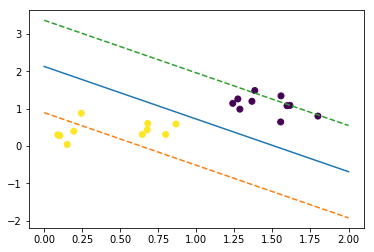

In [10]:
# Apply linear SVM to Iris dataset.
from sklearn.svm import LinearSVC

x1_c1 = 0 + np.random.rand(1,10)
x2_c1 = 0 + np.random.rand(1,10)
y_c1 = np.ones([1,10])

x1_c2 = 1 + np.random.rand(1,10)
x2_c2 = 0.5 + np.random.rand(1,10)
y_c2 = -1 * np.ones([1,10])

x1 = np.concatenate([x1_c1,x1_c2])
x2 = np.concatenate([x2_c1,x2_c2])
y = np.concatenate([y_c1,y_c2])

plt.scatter(x1,x2,c=y)

x1 = x1.reshape(-1,1)
x2 = x2.reshape(-1,1)
x = np.concatenate([x1,x2], axis=1)
y = y.reshape(-1,1)

lin_svc = LinearSVC()
lin_svc.fit(x,y)
print(lin_svc.coef_.shape)
print(lin_svc.intercept_)

w1= lin_svc.coef_[0,0]
w2 = lin_svc.coef_[0,1]
b = lin_svc.intercept_

xs = np.linspace(0,2,100)
ys1 = (-b-w1*xs)/w2
ys2 = (1-b-w1*xs)/w2
ys3 = (-1-b-w1*xs)/w2
plt.plot(xs,ys1)
plt.plot(xs,ys2,'--')
plt.plot(xs,ys3,'--')
plt.show()

## Alternative view of logistic regression

Model (for binary classifier):

$h_\theta(x) = \frac{1}{1 + e^{-x\cdot\theta^T}}$.

- If $y=1$, we want $h_\theta(x)\approx 1$ and $x\cdot\theta^T$ has a large positive value.
- If $y=0$, we want $h_\theta(x)\approx 0$ and $x\cdot\theta^T$ has a large negative value.

Cost of a data example $(x, y)$:
- If $y=1$, the cost is $cost_1(x) := -\log h_\theta(x)$.
- If $y=0$, the cost is $cost_0(x) := -\log (1 - h_\theta(x))$.
- (Unified expression for cost): $y\cdot cost_1(x) + (1-y)\cdot cost_0(x)$.

Objective of training a logistic regression model (with L2 regularization): 

$\min_\theta \frac{1}{m}\sum_{i=1}^m[y^{(i)}\cdot cost_1(x^{(i)}) + (1-y^{(i)})\cdot cost_0(x^{(i)})]+ \alpha\sum_{i=1}^n\theta_i^2$ 

In [11]:
# Numerical example of logistic regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
data = pd.DataFrame(np.array([
    [1, 2, 0],
    [2, 1, 1],
    [0, 3, 0]
]),
                    columns=['x_1', 'x_2', 'y'])
print(data)

# Build logistic regression model:
def h_theta(x, **kwarg):
    return 1 / (1 + np.exp(x.dot(theta)))


theta = np.array([1, 2])
print('h_theta(1, 2):', h_theta(np.array([1, 2]), theta=theta))

# Build cost1 and cost2
def cost1(x, **kwarg):
    return -np.log(h_theta(x, theta=theta))

def cost2(x, **kwarg):
    return -np.log(1 - h_theta(x, theta=theta))

def cost(x, y, **kwarg):
    return y * cost1(x, theta=theta) + (1-y) * cost2(x, theta=theta)

x = data.iloc[0, :2]
y = data.iloc[0, 2]
print('x:', x)
print('y:', y)
print('h_theta(x):', h_theta(x, theta=theta))
print('cost:', cost(x, y, theta=theta))

   x_1  x_2  y
0    1    2  0
1    2    1  1
2    0    3  0
h_theta(1, 2): 0.00669285092428
x: x_1    1
x_2    2
Name: 0, dtype: int32
y: 0
h_theta(x): 0.00669285092428
cost: 0.00671534848912


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

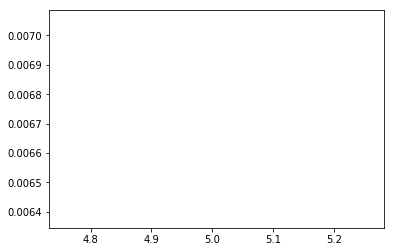

In [14]:
# Plot these four functions in one graph:
# 1) cost1(x);
# 2) cost0(x);
# 3) max(0, 1-x);
# 4) max(0, x+1)
plt.plot(cost1(x),cost2(x))
plt.plot(max(0, 1-x))
plt.plot(max(0, x+1))
plt.show()

The logistic loss is very similar to the hinge loss function.

The logistic regression model with L2 regularization can be explained as an linear SVM with logistic loss instead of hinge loss. 

### Homework (due on Monday, April 9)
1. Complete this notebook.
2. Read Chapter 1 of the textbook and answer question 1-8 on page 31. (write your answer in the markdown cell below).

### Homework Questions:

1. How would you define Machine Learning?  
Machine Learning is the science and art of programming computers so they can learn from data.

2. Can you name four types of problems where it shines?  
Machine Learning shines in problems for which existing solutions require a lot of hand-tuning or long lists of rules, complex problems for which there is no good solution at all using a traditional approach, fluctuating environments, and getting insights about complex problems and large amounts of data.

3. What is a labeled training set?  
A labeled training set is a set that includes the desired solutions of the training data you feed into the algorithm.

4. What are the two most common supervised tasks?  
The two most common supervised tasks are classification and regression (predicting a target numeric value).

5. Can you name four common unsupervised tasks?  
Four common unsupervised tasks are clustering, visualization, dimensionality reduction, and association rule learning.

6. What type of Machine Learning algorithm would you use to allow a robot to walk in various unknown terrains?  
A semisupervised learning algorithm called reinforcement learning.

7. What type of algorithm would you use to segment your customers into multiple groups?  
A semisupervised learning algorithm called online learning.

8. Would you frame the problem of spam detection as a supervised learning problem or an unsupervised learning problem?  
I would classify it as a supervised learnig problem since a typical supervised learning task is classification.